In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow # para visualizar imágenes
from skimage import io
from PIL import Image
import matplotlib.pylab as plt
%matplotlib inline


ruta = '/content/drive/Shareddrives/JPDP/2023_1/Vision/'


# Detección de bordes

- Los bordes separan zonas con valores homogéneos.
- Los filtros derivativos dan información respecto al cambio de intensidad en una dirección.
- Observe que las zonas con derivadas más altas pueden asociarse a bordes.
- Resulta interesante umbralizar.

![https://i.stack.imgur.com/9xbSz.jpg](https://i.stack.imgur.com/9xbSz.jpg)

## Para qué usar bordes?
- Representa el contenido de las imágenes con curvas, líneas o contornos.
- El contenido es más compacto (*False* o *True* en lugar de los posibles niveles de gris)
- Pueden ser invariantes ante cambios en la iluminación.
- Útil para reconocimiento de patrones.

- Se lee la imagen y se lleva a tonos de gris

In [ ]:
 img = io.imread(ruta + 'geome2.png') # Lee imagen
# img = io.imread(ruta + 'Lena.png') # Lee imagen
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY) # Convierte imagen a tonos de gris


- Se definen los operadores derivativos

In [ ]:
filtro_Prewitt1 = np.array([[-1,0,1],
                            [-1,0,1],
                            [-1,0,1]])

filtro_Prewitt2 = np.array([[1,1,1],
                            [0,0,0],
                            [-1,-1,-1]])

- Se usan los operadores para filtrar la imagen y se obtienen aproximaciones de gradiente de la imagen.
![https://i0.wp.com/theailearner.com/wp-content/uploads/2019/05/gr4.png?resize=625%2C263&ssl=1](https://i0.wp.com/theailearner.com/wp-content/uploads/2019/05/gr4.png?resize=625%2C263&ssl=1)

In [ ]:

imgPrewitt1 = cv.filter2D(img,cv.CV_64F, filtro_Prewitt1)
imgPrewitt2 = cv.filter2D(img,cv.CV_64F, filtro_Prewitt2)

imgPrewitt1Norm = cv.normalize(imgPrewitt1, None, alpha=0, beta=255, norm_type=cv.NORM_MINMAX)
imgPrewitt2Norm = cv.normalize(imgPrewitt2, None, alpha=0, beta=255, norm_type=cv.NORM_MINMAX)


**Visualización**

original


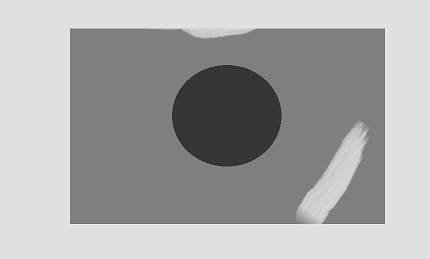

In [ ]:

print('original')
cv2_imshow(img)


- Bordes verticales porque la derivada es respecto al eje horizontal.

Prewitt1


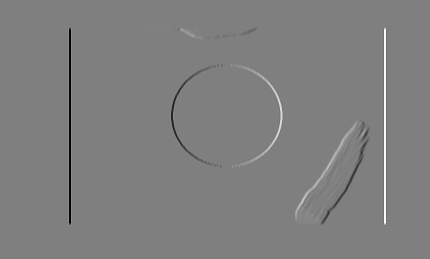

In [ ]:
print('Prewitt1')
cv2_imshow(imgPrewitt1Norm)


- Bordes horizontales porque la derivada es respecto al eje vertical.

Prewitt2


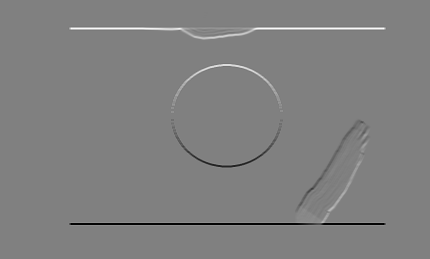

In [ ]:
print('Prewitt2')
cv2_imshow(imgPrewitt2Norm)


- Los bordes se resaltan solo con valores positivos $Mag = |dX| + |dY|$

In [ ]:
imgPrewitt1Abs = np.abs(imgPrewitt1)
imgPrewitt2Abs = np.abs(imgPrewitt2)
imgPrewitt12Abs = imgPrewitt1Abs + imgPrewitt2Abs
imgPrewitt1AbsNorm = cv.normalize(imgPrewitt1Abs, None, alpha=0, beta=255, norm_type=cv.NORM_MINMAX)
imgPrewitt2AbsNorm = cv.normalize(imgPrewitt2Abs, None, alpha=0, beta=255, norm_type=cv.NORM_MINMAX)
imgPrewitt12AbsNorm = cv.normalize(imgPrewitt12Abs, None, alpha=0, beta=255, norm_type=cv.NORM_MINMAX)


Abs Prewitt1


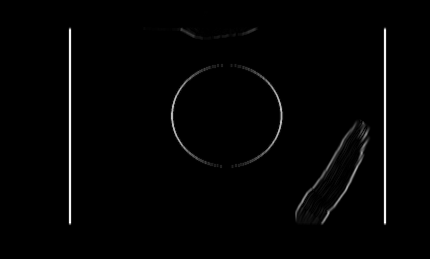

In [ ]:

print('Abs Prewitt1')
cv2_imshow(imgPrewitt1AbsNorm)

Abs Prewitt2


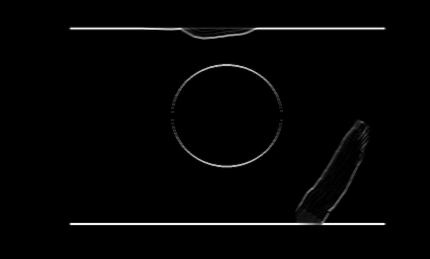

In [ ]:
print('Abs Prewitt2')
cv2_imshow(imgPrewitt2AbsNorm)

Abs Prewitt1 + Abs Prewitt2


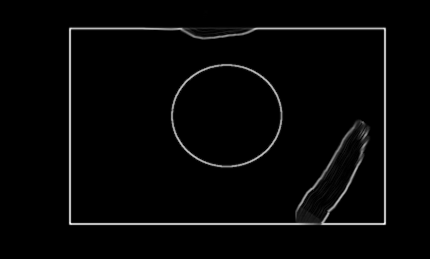

In [ ]:
print('Abs Prewitt1 + Abs Prewitt2')
cv2_imshow(imgPrewitt12AbsNorm)



- Se umbraliza la imagen magnitud de gradiente.
![https://svi.nl/wikiimg/SeedAndThreshold_02.png](https://svi.nl/wikiimg/SeedAndThreshold_02.png)

Bordes detectados con th = 5


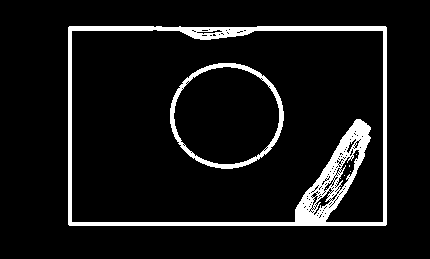

In [ ]:
th = 5
_, bordes_th = cv.threshold(imgPrewitt12AbsNorm, th, 255, cv.THRESH_BINARY)
print('Bordes detectados con th = '+ str(th))
cv2_imshow(bordes_th)

Bordes detectados con th = 15


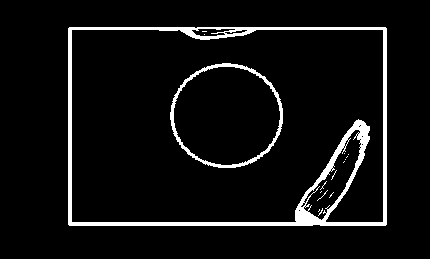

In [ ]:
th = 15
_, bordes_th = cv.threshold(imgPrewitt12AbsNorm, th, 255, cv.THRESH_BINARY)
print('Bordes detectados con th = '+ str(th))
cv2_imshow(bordes_th)

Bordes detectados con th = 50


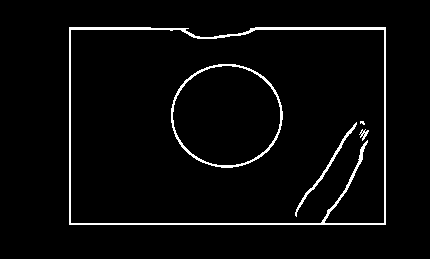

In [ ]:
th = 50
_, bordes_th = cv.threshold(imgPrewitt12AbsNorm, th, 255, cv.THRESH_BINARY)
print('Bordes detectados con th = '+ str(th))
cv2_imshow(bordes_th)

Bordes detectados con th = 100


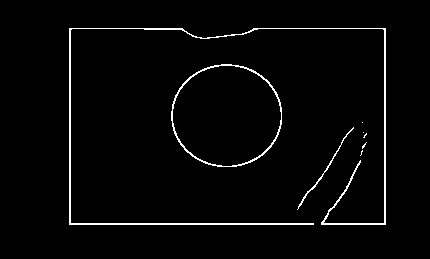

In [ ]:
th = 100
_, bordes_th = cv.threshold(imgPrewitt12AbsNorm, th, 255, cv.THRESH_BINARY)
print('Bordes detectados con th = '+ str(th))
cv2_imshow(bordes_th)

Bordes detectados con th = 150


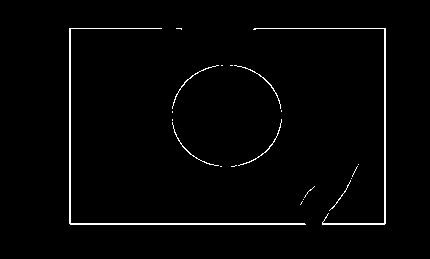

In [ ]:
th = 150
_, bordes_th = cv.threshold(imgPrewitt12AbsNorm, th, 255, cv.THRESH_BINARY)
print('Bordes detectados con th = '+ str(th))
cv2_imshow(bordes_th)

Bordes detectados con th = 200


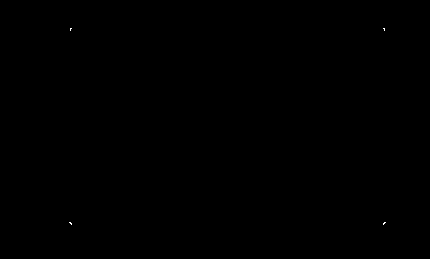

In [ ]:
th = 200
_, bordes_th = cv.threshold(imgPrewitt12AbsNorm, th, 255, cv.THRESH_BINARY)
print('Bordes detectados con th = '+ str(th))
cv2_imshow(bordes_th)

- ¿cómo se define $th$?
- ¿Ideas para que el borde quede delgado?
- ¿Qué efecto tiene el ruido?

## Detector Canny

Bordes canny


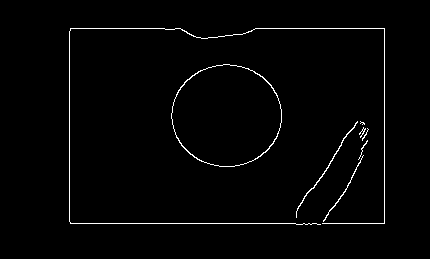

In [ ]:
edges = cv.Canny(img,100,200)
print('Bordes canny')
cv2_imshow(edges)